In [25]:
!pip install gensim pyLDAvis==2.1.2 scikit-learn wordcloud
!python -m nltk.downloader stopwords wordnet

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
pip install pandas==1.3.5

  Using cached pandas-1.3.5.tar.gz (4.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user


In [ ]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
print(f"Number of documents: {len(documents)}")

Number of documents: 18846


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

clean_docs = [preprocess(doc) for doc in documents]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(clean_docs)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
count = count_vectorizer.fit_transform(clean_docs)

In [ ]:
num_clusters = 20
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf)

clusters = km.labels_

terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in km.cluster_centers_.argsort()[:, -10:][i]]
    print(f"Cluster {i}: {top_terms}")

Cluster 0: ['portable', 'please', 'cmos', 'incorrectly', 'diagnostics', 'configuration', 'byte', 'machine', 'diskette', 'compaq']
Cluster 1: ['assent', 'deny', 'god', 'alleged', 'church', 'lourdes', 'private', 'fatima', 'catholic', 'revelation']
Cluster 2: ['berlin', 'ext', 'bit', 'sys', 'support', 'booting', 'card', 'enabler', 'mb', 'boot']
Cluster 3: ['able', 'looking', 'called', 'youre', 'copy', 'check', 'exactly', 'checked', 'eric', 'pcxview']
Cluster 4: ['time', 'im', 'think', 'people', 'dont', 'get', 'like', 'know', 'one', 'would']
Cluster 5: ['god', 'spatout', 'believing', 'james', 'christian', 'lukewarm', 'deed', 'saved', 'roman', 'faith']
Cluster 6: ['specious', 'sodomite', 'opinons', 'largeely', 'jude', 'homosexuality', 'angel', 'lust', 'sodom', 'flesh']
Cluster 7: ['regularseason', 'nauseum', 'right', 'mr', 'president', 'cup', 'left', 'winner', 'middle', 'guy']
Cluster 8: ['side', 'harmon', 'sommer', 'usrensetcorganization', 'harmonsgyrowvtekcom', 'steer', 'left', 'neck', 'h

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(count)

terms = count_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: ", [terms[i] for i in topic.argsort()[-10:]])

Topic 0:  ['belief', 'say', 'believe', 'religion', 'christ', 'bible', 'one', 'christian', 'jesus', 'god']
Topic 1:  ['use', 'circuit', 'battery', 'stephanopoulos', 'dont', 'ground', 'wire', 'mr', 'power', 'one']
Topic 2:  ['software', 'also', 'get', 'system', 'version', 'image', 'use', 'program', 'window', 'file']
Topic 3:  ['also', 'doctor', 'cancer', 'study', 'health', 'medical', 'drug', 'patient', 'disease', 'maxaxaxaxaxaxaxaxaxaxaxaxaxaxax']
Topic 4:  ['one', 'last', 'hockey', 'season', 'would', 'db', 'year', 'player', 'team', 'game']
Topic 5:  ['clipper', 'phone', 'weapon', 'use', 'government', 'law', 'chip', 'would', 'key', 'gun']
Topic 6:  ['would', 'shuttle', 'moon', 'orbit', 'satellite', 'mission', 'launch', 'earth', 'system', 'space']
Topic 7:  ['time', 'thing', 'say', 'like', 'know', 'think', 'one', 'dont', 'would', 'people']
Topic 8:  ['general', 'privacy', 'university', 'administration', 'new', 'government', 'encryption', 'mr', 'technology', 'president']
Topic 9:  ['bos', 

Topic 0


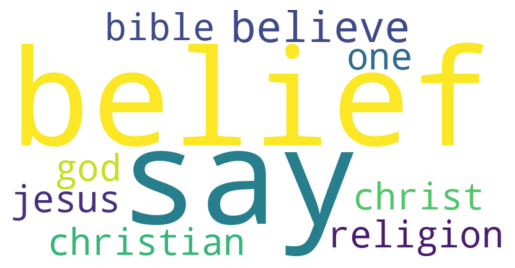

Topic 1


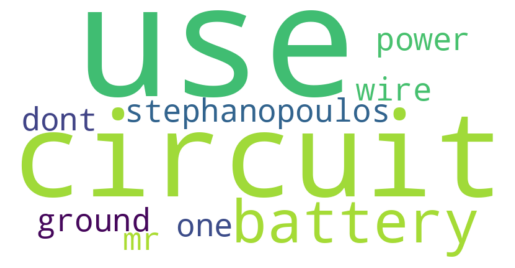

Topic 2


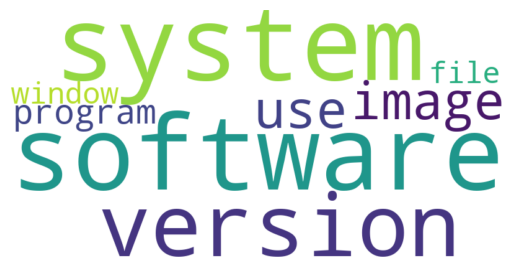

Topic 3


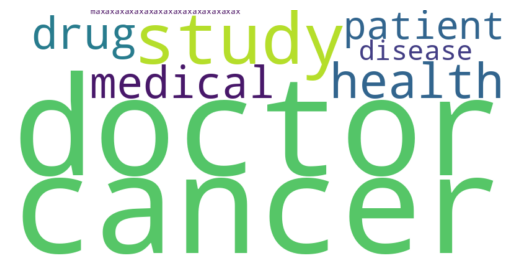

Topic 4


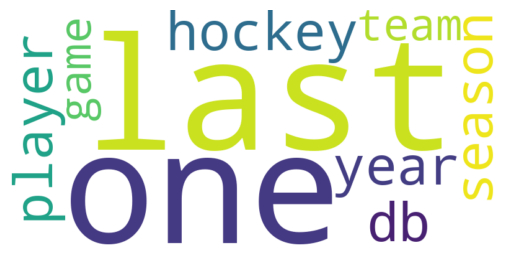

Topic 5


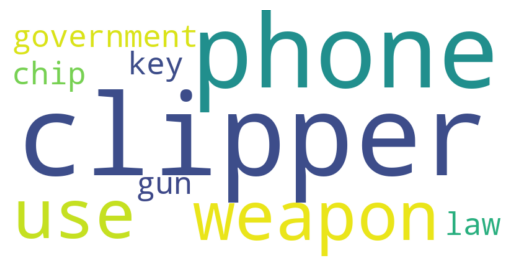

Topic 6


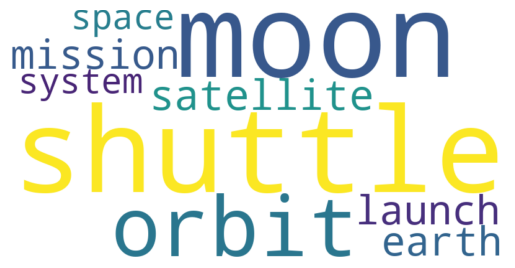

Topic 7


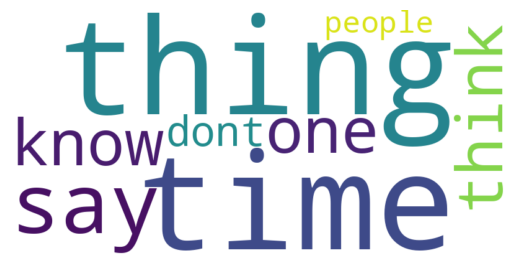

Topic 8


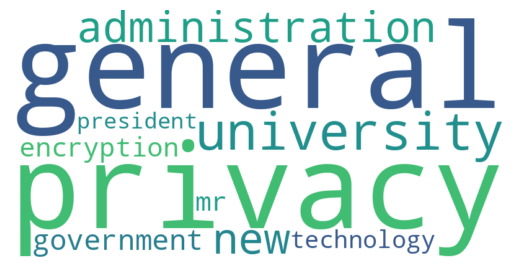

Topic 9


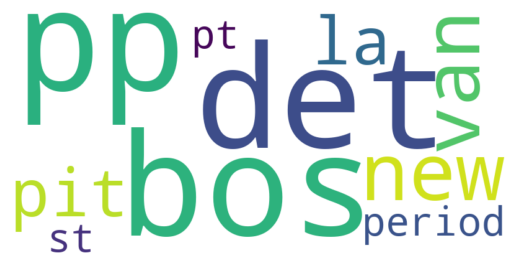

Topic 10


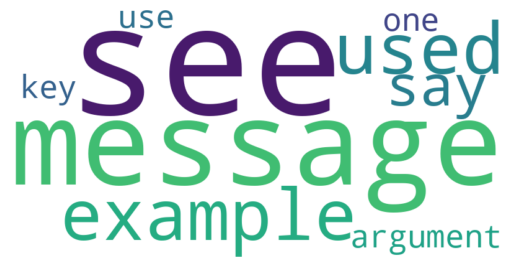

Topic 11


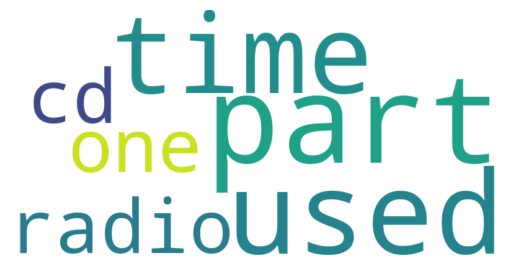

Topic 12


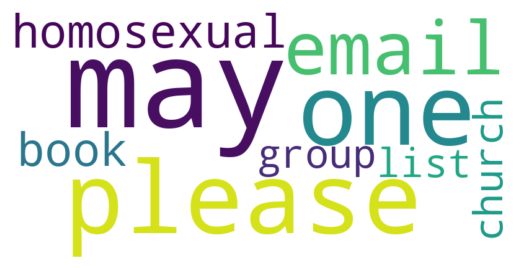

Topic 13


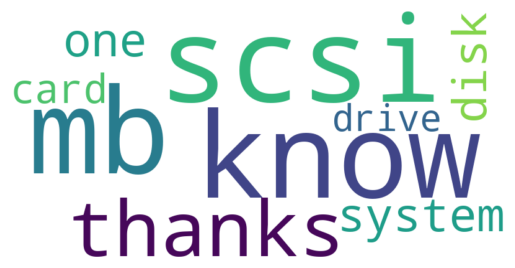

Topic 14


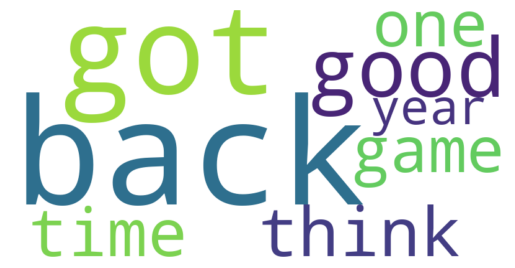

Topic 15


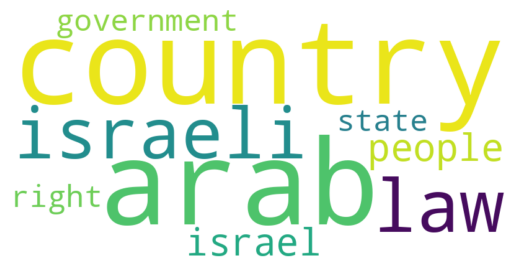

Topic 16


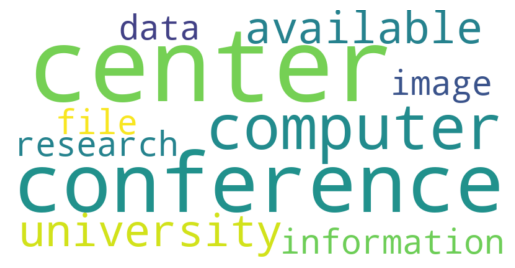

Topic 17


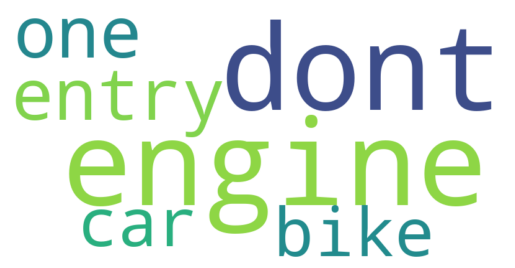

Topic 18


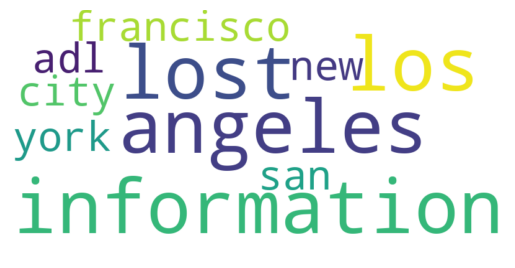

Topic 19


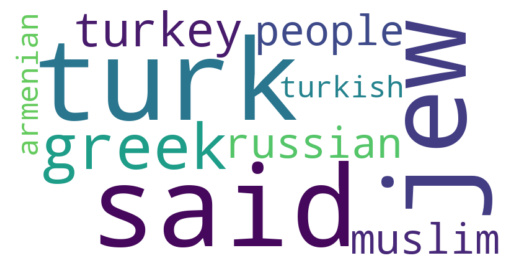

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(topic_terms):
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_terms))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}")
    terms = [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    plot_wordcloud(terms)

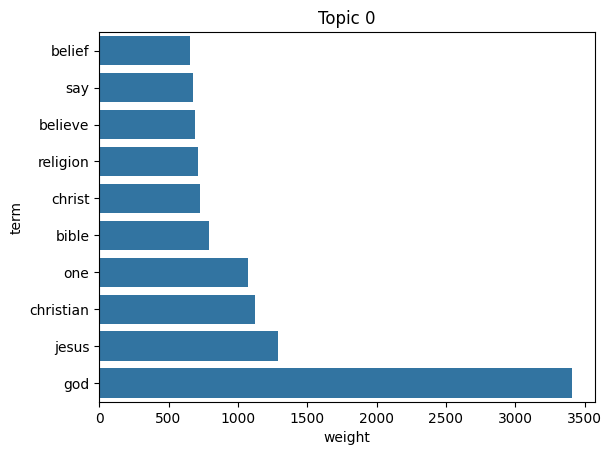

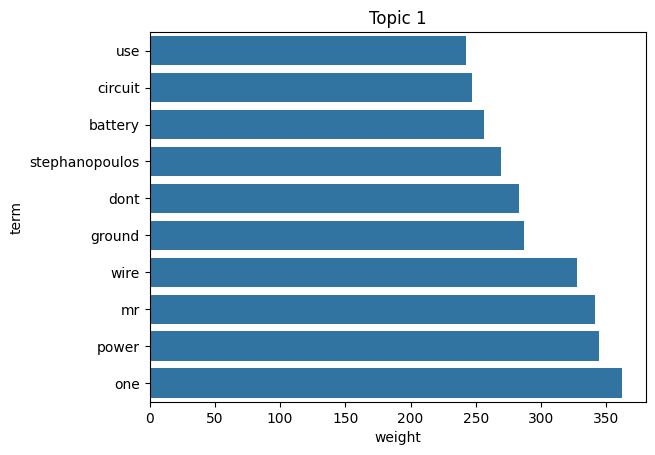

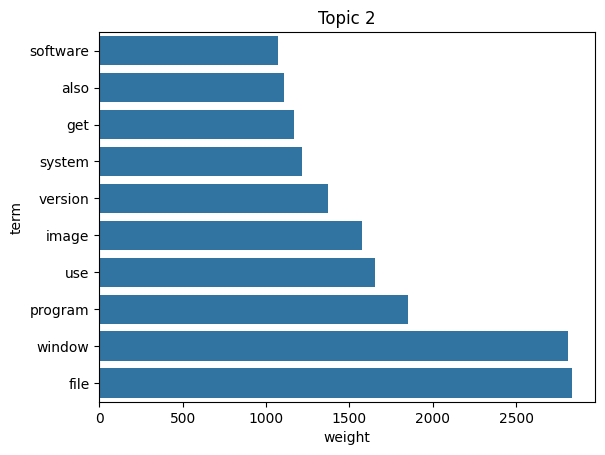

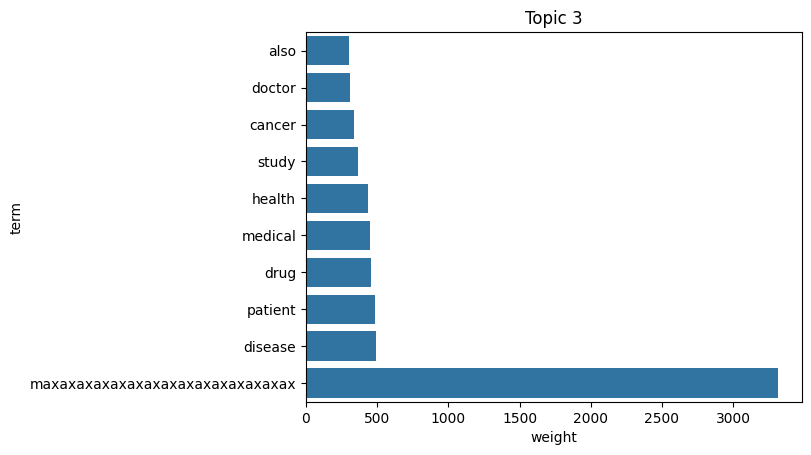

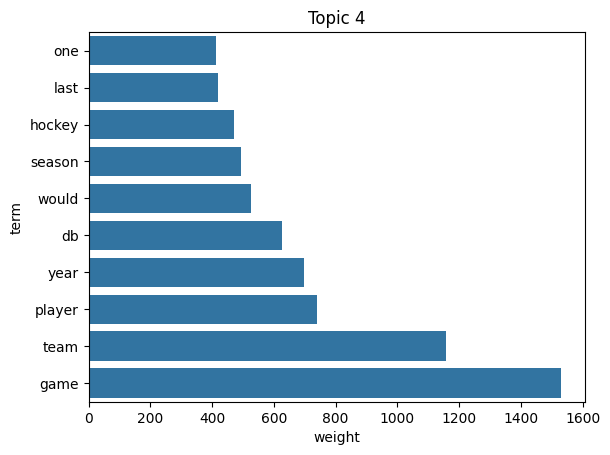

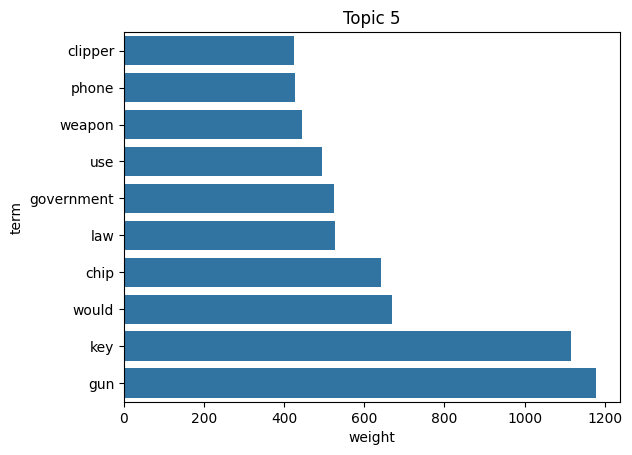

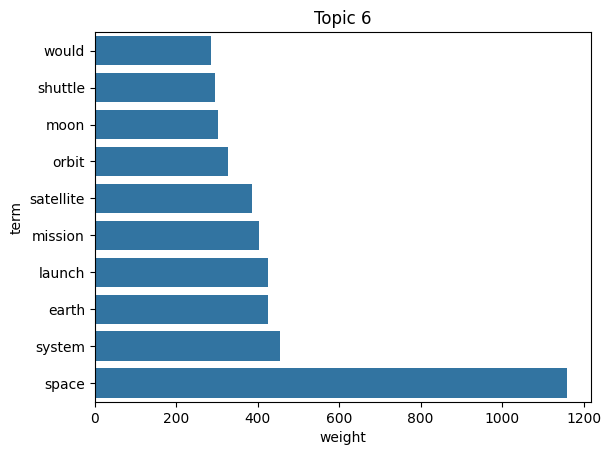

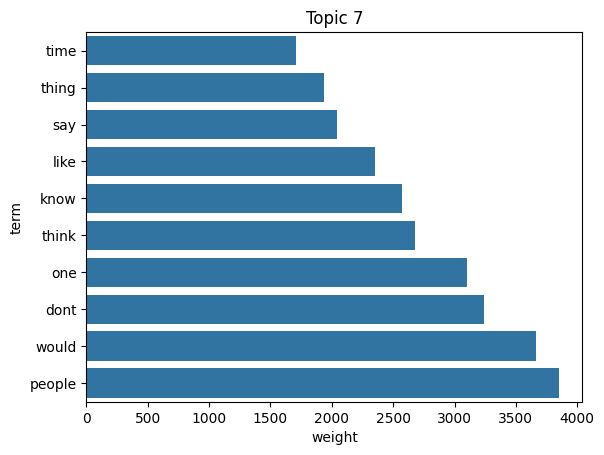

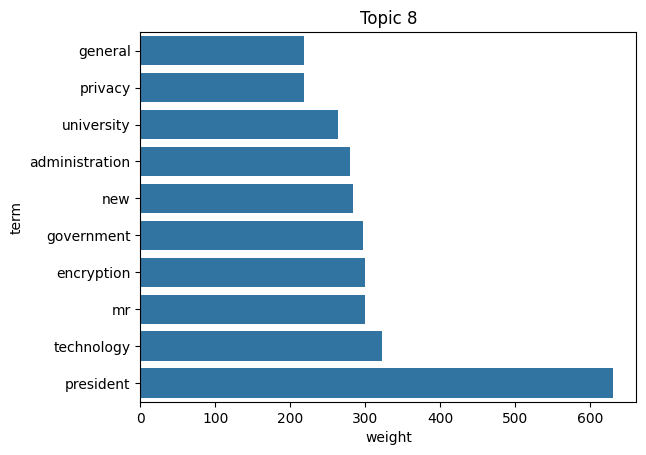

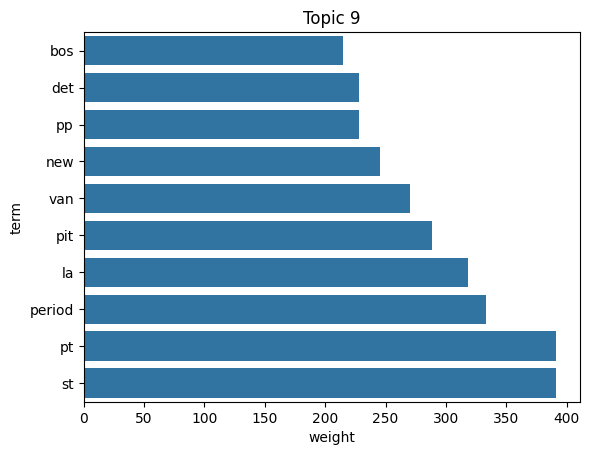

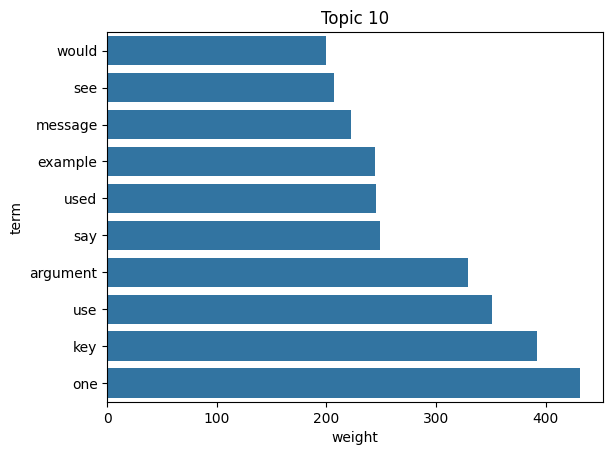

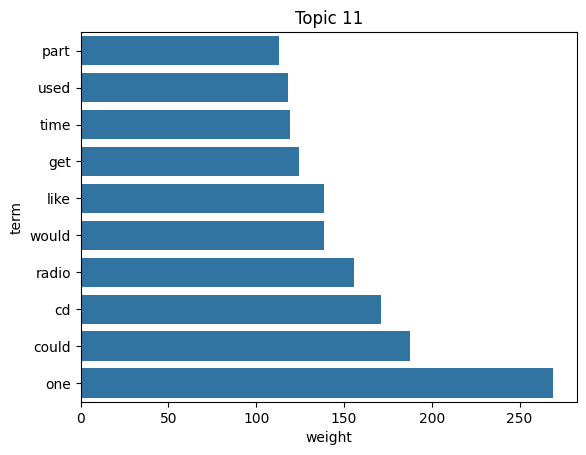

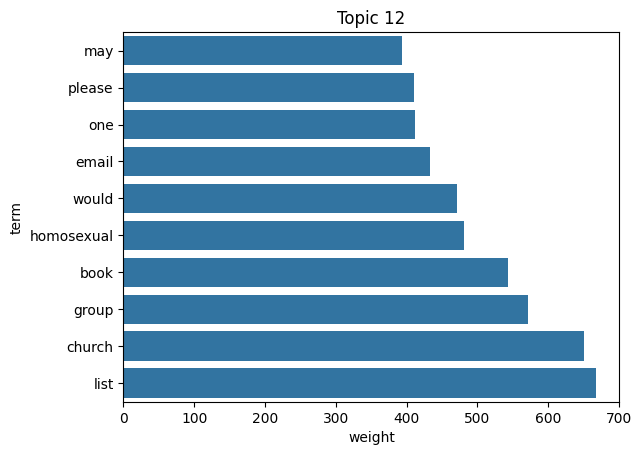

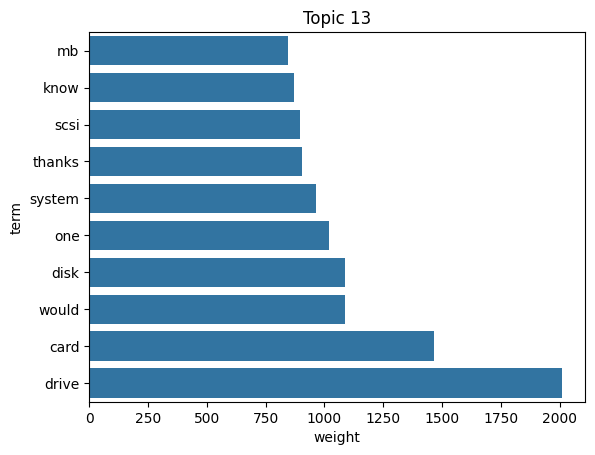

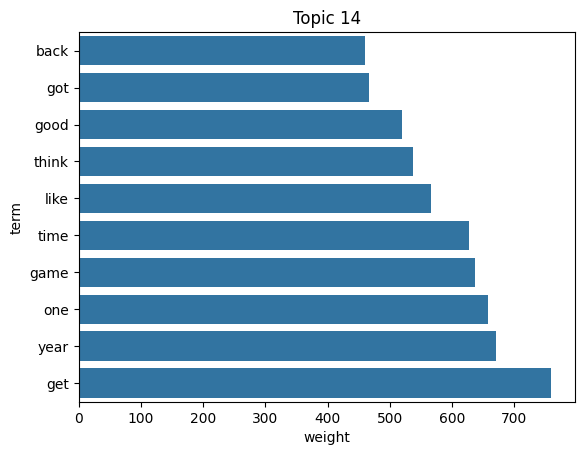

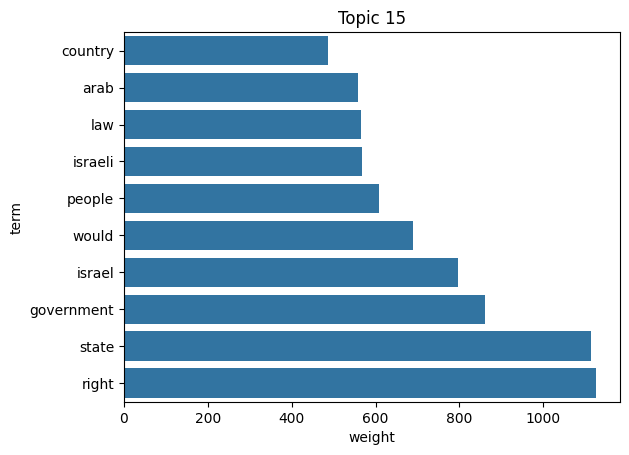

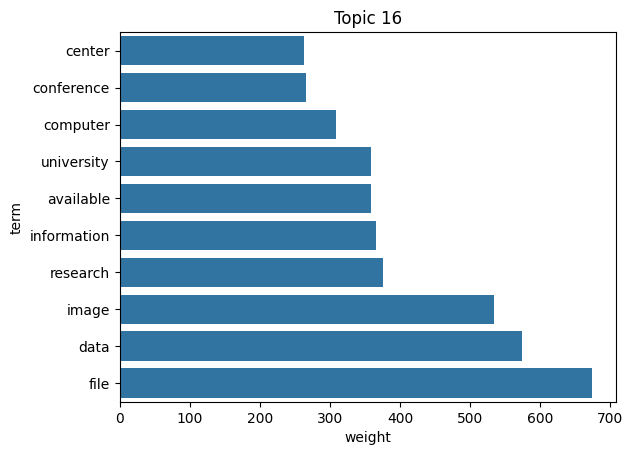

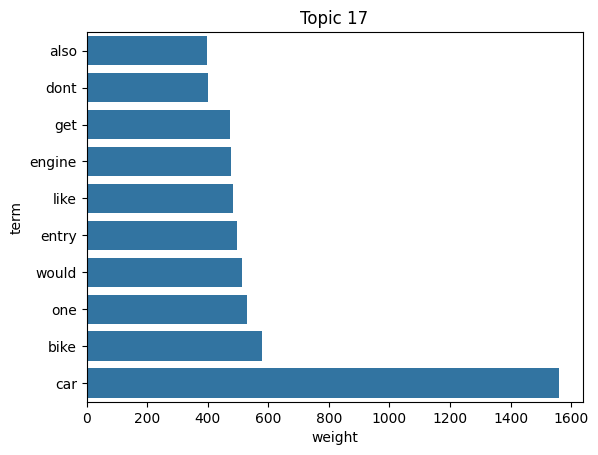

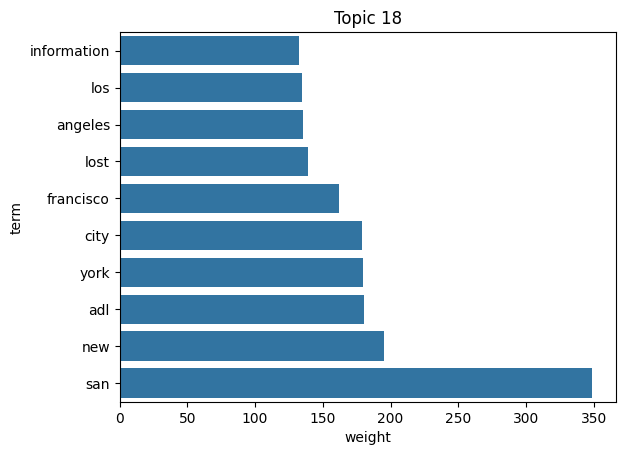

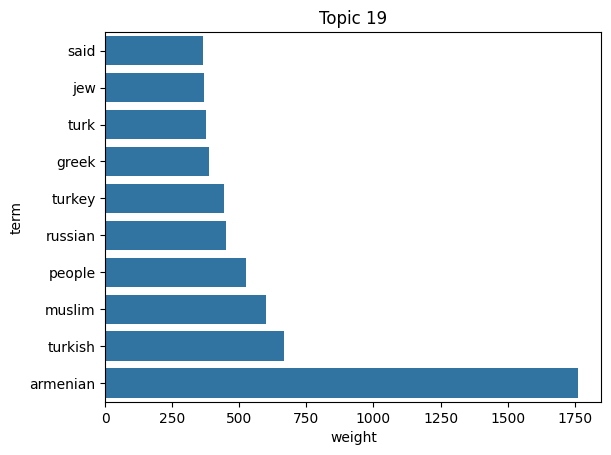

In [38]:
import seaborn as sns
import pandas as pd

def plot_top_words(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_top_words:]
        top_terms = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]

        df = pd.DataFrame({'term': top_terms, 'weight': top_weights})
        sns.barplot(x='weight', y='term', data=df)
        plt.title(f"Topic {idx}")
        plt.show()

plot_top_words(lda, count_vectorizer.get_feature_names_out())


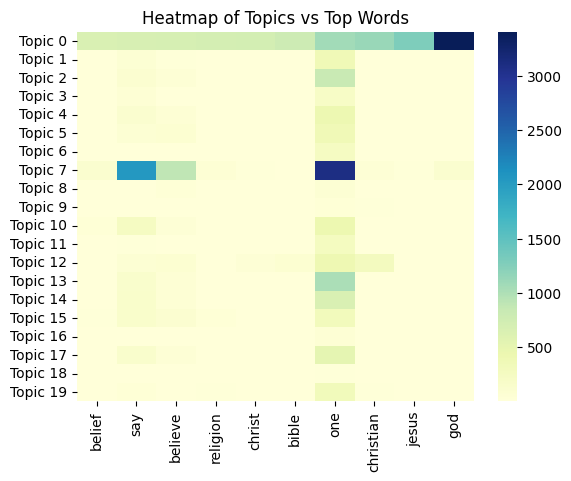

In [40]:
import numpy as np

top_n = 10
top_words = [count_vectorizer.get_feature_names_out()[i] for i in lda.components_[0].argsort()[-top_n:]]
heatmap_data = np.array([topic[lda.components_[0].argsort()[-top_n:]] for topic in lda.components_])

sns.heatmap(heatmap_data, yticklabels=[f"Topic {i}" for i in range(lda.n_components)], xticklabels=top_words, cmap="YlGnBu")
plt.title("Heatmap of Topics vs Top Words")
plt.show()
